In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import HTML
from IPython.display import display
import requests # library to handle requests

#Load Data; #Update 202111
df = pd.read_csv('Datasets/Assessors_Parcel_Data_2021.csv')

df.head(4)

,ObjectId,PIN,ASMTYEAR,TAXYEAR,HOUSE_NO,STREET_NAME,UNIT_NO,ZIP_POSTAL,FORMATTED_ADDRESS,OWNERNM,...,NUM_STORIES,NUM_GAR_STALLS,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS
0,1,102824110001,2021,2022,3033 1/2,29TH AVE S,NaN,55406,3033 1/2 29TH AVE S,CITY OF MINNEAPOLIS ET AL,...,NaN,0,NaN,NaN,NaN,NaN,0.0,0,0,0
1,2,102824110004,2021,2022,3033,29TH AVE S,NaN,55406-1919,3033 29TH AVE S,KATHERINE ZOBRO & A DANIELS,...,1.5,2,FORCED AIR,WOOD FRAME,OTHER,GABLE,1.0,0,1,3
2,3,102824110005,2021,2022,3106,28TH AVE S,NaN,55406-1918,3106 28TH AVE S,DARLENE L CHAPMAN ET AL,...,1.5,1,GRAVITY,WOOD FRAME,METAL/VINYL,GABLE,1.0,1,1,3
3,4,102824110006,2021,2022,3108,28TH AVE S,NaN,55406-1918,3108 28TH AVE S,J B STENGEL & S L HEIDEMANN,...,1.5,2,HOT WATER,WOOD FRAME,STUCCO,GABLE,2.0,1,2,3


In [88]:
p=['PIN', 'HOUSE_NO', 'STREET_NAME', 'UNIT_NO', 'ZIP_POSTAL', 'FORMATTED_ADDRESS','OWNERNM','NEIGHBORHOOD', 'COMMUNITY','WARD', 'ZONING', 'LANDUSE', 'PARCEL_AREA_SQFT', 'PRIMARY_PROP_TYPE', 'BLDGVALUE', 'TOTALVALUE', 'IS_MULTIPLE_USES', 'IS_EXEMPT', 
   'NUM_BLDGS','BUILDINGUSE','YEARBUILT', 'NUM_STORIES', 'NUM_GAR_STALLS', 'PRIMARYHEATING','CONSTRUCTIONTYPE','EXTERIORTYPE','TOTAL_UNITS','BATHROOMS','BEDROOMS']
a=df[p]

cols=['TID','Add_No','Add_Street','Add_Unit','Zip', 'address','Owner','Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type', 'BLD_Val', 'Total_Val', 
     'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use','YearBuilt','Num_Stories','Num_Garage','Heating','Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms']
a.columns= cols

a['address']= a['address'].str.strip()
#a['address']= a['address'].str.replace(' P1',' #1')
#a['address']= a['address'].str.replace(' P2',' #2')
#a['address']= a['address'].str.replace(' P3',' #3')
#a['address']= a['address'].str.replace(' P4',' #4')
a['Zip5'] = a['Zip'].str[:5]
a['Community']= a['Community'].str.title()
a['Community']= a['Community'].str.replace('-',' ')

#a.head(4)
#a.query('Add_Unit=="P3217"')

In [41]:
a['dex']=1
p=['dex', 'TID']

h=a[p].groupby(['TID']).sum()
h.dex.unique()
h.query('dex>1')
ef.head(4)
#132 double entries; 5 tri[le entries], 3 entrie,2, 2 

,X,Y,apn,OBJECTID,licenseNumber,category,milestone,tier,status,issueDate,...,licensedUnits,ward,neighborhoodDesc,communityDesc,policePrecinct,shortTermRental,latitude,longitude,xWebMercator,yWebMercator
0,-93.307754,44.895922,2102824320092,1,LIC385097,CONV,Active,Tier 1,Active,2019/11/07 10:03:49+00,...,1,13.0,Armatage,Southwest,5.0,No,44.89592,-93.30775,-1.038697e+07,5.605151e+06
1,-93.290564,45.046278,1211821240019,2,LIC375543,CONV,Active,Tier 1,Active,2019/01/07 08:11:35+00,...,1,4.0,Lind - Bohanon,Camden,4.0,No,45.04628,-93.29056,-1.038506e+07,5.628810e+06
2,-93.287601,45.017718,1002924220117,3,LIC392965,CONVEXEMPT,License Re,Tier 1,Active,2021/07/02 10:00:43+00,...,1,4.0,McKinley,Camden,4.0,No,45.01772,-93.28760,-1.038473e+07,5.624311e+06
3,-93.305824,44.980465,2102924330058,4,LIC392462,CHOWN,Active,Tier 1,Active,2020/12/23 16:57:30+00,...,1,5.0,Harrison,Near North,4.0,No,44.98047,-93.30582,-1.038676e+07,5.618447e+06


In [54]:
#Load Data
ef = pd.read_csv('Datasets/Active_Rental_Licenses.csv')

p=['X','Y', 'apn','category','status','licenseNumber','milestone','tier','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantAddress1', 'applicantPhone', 'applicantEmail', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']       
ren=ef[p]
cols= ['X','Y', 'TID','category','status','licenseNumber','milestone','tier','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantAddress1', 'applicantPhone', 'applicantEmail', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']
ren.columns= cols


from datetime import datetime

ren['address']= ren['address'].str.strip()
ren['ownerAddress1']= ren['ownerAddress1'].str.strip()
ren['applicantAddress1']= ren['applicantAddress1'].str.strip()

ren['add6']= ren['address'].str[:6]
ren['oadd6']= ren['ownerAddress1'].str[:6]
ren['padd6']= ren['applicantAddress1'].str[:6]

ren['ExpDate']= pd.to_datetime(ren['expirationDate']) # Create new column called DateTime
ren['ExpYear']= ren['ExpDate'].dt.year #create year column
ren['ExpMonth']= ren['ExpDate'].dt.month
ren['ExpDay']= ren['ExpDate'].dt.day
ren['LicExpDate']='03/01/' + ren['ExpYear'].astype(str)

ren['IssDate']= pd.to_datetime(ren['issueDate']) # Create new column called DateTime
ren['IssYear']= ren['IssDate'].dt.year #create year column
ren['IssMonth'] = ren['IssDate'].dt.month # Create Month Category
ren['IssDay'] = ren['IssDate'].dt.day #Create Day of the Current month
ren['LicIssueDate']= ren['IssMonth'].astype(str) + '/' + ren['IssDay'].astype(str) + '/' + ren['IssYear'].astype(str)


#Duplicate Licenses
# LIC386276,LIC389668, LIC396985, LIC397106

ren = ren.drop_duplicates(keep=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
bad= ren.query('ExpYear<2021') #outdate records
ren= ren.query('ExpYear>2021')
ren= ren[~ren['TID'].str.contains('A')]
ren['TID'] = ren['TID'].astype(np.int64)

#Owner Occupied Column
ren['Owner_Occupied1'] = np.where(ren['add6'] == ren['oadd6'], 1, 0)
ren['Owner_Occupied2'] = np.where(ren['add6'] == ren['padd6'], 1, 0)

ren['Owner_Occupied1'].value_counts()
ren['Owner_Occupied2'].value_counts()
ren['Owner_Occupied']= ren['Owner_Occupied1'] + ren['Owner_Occupied2']

ren['Owner_Occupied'].value_counts()
ren['Owner_Occupied'] = np.where(ren['Owner_Occupied']>0, 1, 0)



#ren['TID'] = ren['TID'].astype(np.int64)


ren.head(4)




,X,Y,TID,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,...,ExpDate,ExpYear,ExpMonth,ExpDay,LicExpDate,IssDate,IssYear,IssMonth,IssDay,LicIssueDate
0,-93.307754,44.895922,2102824320092,CONV,Active,LIC385097,Active,Tier 1,2019/11/07 10:03:49+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2019-11-07 10:03:49+00:00,2019,11,7,11/7/2019
1,-93.290564,45.046278,1211821240019,CONV,Active,LIC375543,Active,Tier 1,2019/01/07 08:11:35+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2019-01-07 08:11:35+00:00,2019,1,7,1/7/2019
2,-93.287601,45.017718,1002924220117,CONVEXEMPT,Active,LIC392965,License Re,Tier 1,2021/07/02 10:00:43+00,2022/03/01 00:00:00+00,...,2022-03-01 00:00:00+00:00,2022,3,1,03/01/2022,2021-07-02 10:00:43+00:00,2021,7,2,7/2/2021
3,-93.305824,44.980465,2102924330058,CHOWN,Active,LIC392462,Active,Tier 1,2020/12/23 16:57:30+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2020-12-23 16:57:30+00:00,2020,12,23,12/23/2020


In [68]:

#ren['Owner_Occupied'] = np.where((ren['add6'] == ren['oadd6']) or (ren['add6'] == ren['padd6']), 1, 0)


#ren['Owner_Ocupied'] = (== (ren['ownerAddress1'].str[:6] | ren['ownerAddress1'].str[:6] == 0).astype(int)



In [89]:
ren['dex']=1
p=['dex', 'TID']

h=ren[p].groupby(['TID']).sum()
h.dex.unique()
Sin=h.query('dex==1')
Sin=Sin.reset_index()

Mult=h.query('dex>1')
Mult=Mult.reset_index()

S1= pd.merge(ren, Sin, on='TID', how='right')
#S1.shape #21166
#ren.shape #21908
Mult

M1= pd.merge(ren, Mult, on='TID', how='right')
M1.shape #742
M1

#S1[S1['dex'].isnull()] 

#77 double; 1621 6TH ST NE #triple; 
#ren[ren['address'].str.contains('1300 LAKE ST W', na=False)]


p=['apn','category', 'licenseNumber','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail']       
reny=ef[p]
cols= ['TID', 'category','licenseNumber','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail']   
reny.columns= cols


#-93.307754	44.895922	2102824320092
#reny.query("licenseNumber=='LIC395570'")
#reny.query("TID=='0202824120056'")
#a.query("TID=='0202824120056'")
#ren["TID"].str.find('B')
##ren.query(X)

#a[a['address'].str.contains('4815 28TH AVE', na=False)]

#LIC394538
#LIC399856
#1302824140210

In [90]:
#The Whittle algorithm, find patterns and cut the number of unlinked entries each session

#Prepare Parcel Data
dols= ['address','Add_No','TID']
Hen=a[dols]
Hen['index'] = range(1, len(Hen) + 1) #create Index variable

#Prepare Rental Data
test=['LicExpDate', 'address','TID','licenseNumber']
m= S1[test]

#Merge and the null list shows what are left unmatched
Mas1= pd.merge(Hen, m, on='TID', how='right')
gy=Mas1[Mas1['address_x'].isnull()] 
#m.dty

#141 missing hits


#Prepare Rental Data
test=['LicExpDate', 'address','TID', 'category','licenseNumber']
m= M1[test]
m=m.query("category!='ShrtTrmLic'")

#Merge and the null list shows what are left unmatched
Mas2= pd.merge(Hen, m, on=['TID','address'], how='right')
MW=Mas2[Mas2['Add_No'].notnull()] 

# 185 filled

#495 left

ly=Mas2[Mas2['Add_No'].isnull()] 
test1=['LicExpDate', 'address','TID','licenseNumber']
Mas3= pd.merge(Hen, ly, on='address', how='right')
wy=Mas3[Mas3['Add_No_x'].notnull()]
wy['TID']=wy['TID_x']

#ay=pd.merge(M1, ly, on=['licenseNumber'], how='right')
#ay['address']= ay['address_x']
#ay=ay[test]

#Mas3=pd.merge(Hen, ay, on='address', how='right')
#Mas3[Mas3['Add_No_x'].isnull()] 

#301 left
#193 catched
y=Mas3[Mas3['Add_No_x'].notnull()] 


#1063 [Final Number]

k1=Mas1[Mas1['address_x'].notnull()]
plug=['TID','licenseNumber']
key1= k1[plug]

key2=MW[plug]

key3=wy[plug]

KFin=pd.concat([key1,key3,key2], ignore_index=True)
KFin=KFin.drop_duplicates()
KFin

KFin.shape


#KFin['dex']=1
#p=['dex', 'TID']

#h=KFin[p].groupby(['TID']).sum()
#h.dex.unique()
#h.query('dex>1')




(21403, 2)

In [91]:
#MasterData

#clean for data analysis
cl=['category', 'TID','licenseNumber','tier','LicExpDate', 'LicIssueDate', 'address', 'ownerName', 'applicantName', 'licensedUnits', 'latitude', 'longitude','Owner_Occupied']       
rc=ren[cl]


cols=['TID','Zip5','Owner','Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type', 'BLD_Val', 'Total_Val', 
     'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use','YearBuilt','Num_Stories','Heating','Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms']
Pl=a[cols]


#cl=['category','licenseNumber',]

MS=pd.merge(KFin, rc, on='licenseNumber', how='right')
MS[MS['TID_x'].isnull()] #505
MS['TID']=MS['TID_x']
MS=MS[MS['TID_x'].notnull()]
MS1=pd.merge(Pl,MS , on='TID', how='right')

MS1.shape

MS1[MS1['Ward'].isnull()]


#Fill in the missing community variables from the Renter data to those not matched in Parcel
#e= MS1[MS1['Neighborhood'].notnull()]
#d= MS1[MS1['Neighborhood'].isnull()]
#d['Ward']= d['ward']
#d['Neighborhood']= d['neighborhoodDesc']
#d['Community']= d['communityDesc']
#only 50 records missing

#MS1=pd.concat([e,d], ignore_index=True)
#MS1.shape



,TID,Zip5,Owner,Neighborhood,Community,Ward,Zoning,LandUse,Area,Property_Type,...,tier,LicExpDate,LicIssueDate,address,ownerName,applicantName,licensedUnits,latitude,longitude,Owner_Occupied


In [161]:
#a[a['address'].str.contains('1240 2ND ST S', na=False)]
#ren[ren['address'].str.contains('2810 FREMONT AVE', na=False)]

#ren[ren['licenseNumber'].str.contains('LIC396791', na=False)]

#KFin[KFin['licenseNumber'].str.contains('LIC394754', na=False)]

#Hen.query('index in (97141,97192)')
#a.query('ID in (2302924220086,2302924220109)')




,ID,Add_No,Add_Street,Add_Unit,Zip,address,Owner,Neighborhood,Community,Ward,...,YearBuilt,Num_Stories,Num_Garage,Heating,Construction,Exterior,Tot_Units,Bathrooms,Bedrooms,Zip5
97140,2302924220086,187,ISLAND AVE E,NaN,55401,187 ISLAND AVE E,MPLS PARK & RECREATION BOARD,NICOLLET IS/EAST BANK,UNIVERSITY,3.0,...,1900.0,2.0,0,FORCED AIR,WOOD FRAME,WOOD,1.0,2,4,55401
97191,2302924220109,187,ISLAND AVE E,NaN,55401-1503,187 ISLAND AVE E,MID-RIVER RESIDENCES CO-OP,NICOLLET IS/EAST BANK,UNIVERSITY,3.0,...,1898.0,1.0,0,FORCED AIR,WOOD FRAME,WOOD,1.0,1,2,55401


In [106]:
#testing Community variables
MS1.Community.unique() #24 categories
#MS1.Zoning.unique() #24 categories
#MS1.LandUse.unique()  #17 categories
#MS1.Property_Type.unique() #17 more appropiate for housing
#MS1.Bldg_Use.unique() # very specific categories
#MS1.Heating.unique() # 9 heating options
#MS1.Exterior.unique()

#MS1[MS1['Neighborhood'].isnull()]


SP_map = folium.Map(location=[44.97833811654433,-93.28437562717569], zoom_start=12,tiles="OpenStreetMap")

p=['Community', 'Tot_Units']
Map1=MS1[p].groupby(['Community']).sum()
Map1=Map1.reset_index()

sp_geo = r'Datasets/Minn_Communities.geojson'
    
SP_map.choropleth(
    geo_data=sp_geo,
    data=Map1,
    columns=['Community','Tot_Units'],
    key_on="feature.properties.CommName",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='2021 Minneapolis Tota Units by Community',
    highlight= True
)
    
SP_map


In [109]:

#Import libraries
from plotly import graph_objects as go

#Create figure object
fig = go.Figure(
    go.Choroplethmapbox(
        geojson = sp_geo, #Assign geojson file
        featureidkey = "properties.CommName", #Assign feature key
        locations = Map1['Community'], #Assign location data
        z = Map1['Tot_Units'], #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True,
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 6, #Zoom in scale
    mapbox_center = {"lat": 44.97833811654433, "lon": -93.28437562717569}, #Center location of the map
)

AttributeError: module 'plotly.graph_objects' has no attribute 'Choroplethmapbox'

In [110]:
import plotly.express as px

#df = px.data.election()
#geojson = px.data.election_geojson()

fig = px.choropleth(Map1, geojson=sp_geo, color="Bergeron",
                    locations="Community", featureidkey="properties.CommName",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ImportError: cannot import name 'qualitative' from 'plotly.express.colors' (C:\Users\17189\Anaconda3\lib\site-packages\plotly\express\colors.py)

In [97]:
import requests # library to handle requests
import folium
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient


#load Data
P_15= MS1
Features= ['Ward','Precinct', 'Tot_Vote', 'Tot_Reg','Vote%','H_Dens%', 'H_Dens_Vote%', 'L_Dens_Vote%','Pro_Weight', 'Act_Weight', 'Representation']
P_15= P_15[Features]

def map_2015_SP_CityCouncilRepresentation_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_15 
        A='City Council'
        zo= 12
    else: 
        B= P_15[(P_15['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    #data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    #Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    #Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='Stamen Terrain') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Representation'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2015 Saint Paul ' + A +' Precinct Representation: 06/24/19',
        highlight= True
    )
    
    # display map
    return SP_map

KeyError: "['Act_Weight', 'Vote%', 'H_Dens%', 'Precinct', 'Tot_Vote', 'Tot_Reg', 'Representation', 'L_Dens_Vote%', 'H_Dens_Vote%', 'Pro_Weight'] not in index"

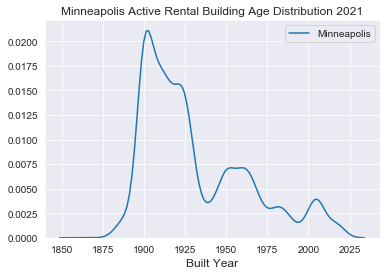

In [38]:
import requests # library to handle requests
import folium
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient

#Create an Age column

#Graphing using seaborn
sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(MS1.YearBuilt, label='Minneapolis')


ax.set_title('Minneapolis Active Rental Building Age Distribution 2021')
plt.xlabel('Built Year', fontsize=12)

#Save Graph
figure = ax.get_figure()    
figure.savefig('MinnBldgAge.png', dpi=400)



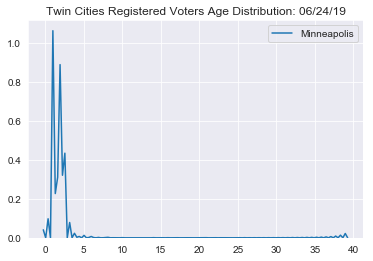

In [208]:
#Graphing using seaborn
sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(MS1.Num_Stories, label='Minneapolis')
#ax= sns.kdeplot(MS1.query('Num_Stories<5'), label='Minneapolis')

ax.set_title('Twin Cities Registered Voters Age Distribution: 06/24/19')

#Save Graph
figure = ax.get_figure()  


In [71]:
MS1['Num_Stories'].value_counts()

MS1['Bldg_Use'].value_counts() #702 multiuse
MS1['Neighborhood'].value_counts()
MS1['Community'].value_counts()
MS1['Property_Type'].value_counts()
MS1['LandUse'].value_counts() # this is better
MS1['Owner_Occupied'].value_counts() #21408 and 3028 are owner occupied


#MS1.head(4)
#'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use',
#'Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms'
#'Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type',

0    18375
1     3028
Name: Owner_Occupied, dtype: int64

In [109]:
ren.communityDesc.unique()

#Community 11

array(['Southwest', 'Camden', 'Near North', 'University', 'Longfellow',
       'Central', 'Northeast', 'Powderhorn', 'Calhoun Isle', 'Nokomis',
       nan, 'Phillips'], dtype=object)

In [107]:
ren.query('communityDesc=="nan"')

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,neighborhoodDesc,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay


In [115]:
ErrCommunityDesc= ren[ren['communityDesc'].isnull()] # 235 & ward is null

l=ren.query('latitude==0')
ErrCoordinates= l[l['communityDesc'].notnull()] #16 Missing Coordinates

ren[ren['ward'].isnull()]


,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,neighborhoodDesc,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay
93,CHOWNEXMPT,Active,LIC131317,License Re,Tier 1,2017/06/15 16:32:31+00,2022/03/01 00:00:00+00,2100 DUPONT AVE N,Chad Schwitters,2015 Emerson Avenue North,...,NaN,NaN,45.00038,-93.29221,2022-03-01 00:00:00+00:00,2022,6/15/2017,2017,6,15
152,CHOWN,Active,LIC130318,Active,Tier 1,2014/09/19 08:45:42+00,2023/03/01 00:00:00+00,500 RUSSELL AVE N,SCOTT H MOEN,507 SHERIDAN AVE N,...,NaN,NaN,44.98284,-93.31065,2023-03-01 00:00:00+00:00,2023,9/19/2014,2014,9,19
276,CONVEXEMPT,Active,LIC397547,License Re,Tier 1D,2021/11/17 12:28:56+00,2022/03/01 00:00:00+00,1240 2ND ST S #825,Katrisha N Neisse,287 Owasso Blvd N,...,NaN,NaN,0.00000,0.00000,2022-03-01 00:00:00+00:00,2022,11/17/2021,2021,11,17
476,CONVEXEMPT,Active,LIC397212,Active,Tier 1,2021/10/25 18:52:41+00,2023/03/01 00:00:00+00,1240 2ND ST S #615,Taylor Reiners,3350 Tyler St NE,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,10/25/2021,2021,10,25
504,CHOWNEXMPT,Active,LIC396809,Active,Tier 1,2021/10/13 12:10:16+00,2023/03/01 00:00:00+00,1240 2ND ST S #1227,Jennifer Viedma,4245 Alden Drive,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,10/13/2021,2021,10,13
534,CHOWN,Active,LIC397464,Active,Tier 1,2022/01/04 10:06:24+00,2023/03/01 00:00:00+00,5050 HIAWATHA AVE,Kurtis Waters,10004 Island Dr,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,1/4/2022,2022,1,4
574,ShrtTrmLic,Active,LIC399466,Active,Tier 1,2022/01/21 13:49:14+00,2023/03/01 00:00:00+00,117 27TH AVE SE,Chris Elsey,"1532 College Ave, Apt F19",...,NaN,NaN,44.96953,-93.22084,2023-03-01 00:00:00+00:00,2023,1/21/2022,2022,1,21
653,ShrtTrmLic,Active,LIC399600,Active,Tier 1,2022/02/07 14:06:04+00,2023/03/01 00:00:00+00,150 26TH AVE SE,MAXWELL VENTURES LLC,ATTN: PATRICK J SMITH,...,NaN,NaN,44.97112,-93.22046,2023-03-01 00:00:00+00:00,2023,2/7/2022,2022,2,7
801,CHOWNEXMPT,Active,LIC131555,Active,Tier 1,2005/11/15 11:36:52+00,2023/03/01 00:00:00+00,2020 1ST ST S #61,WEST BANK COMMUNITY DEV CORP,1808 RIVERSIDE AVE S STE 201,...,NaN,NaN,44.97568,-93.24300,2023-03-01 00:00:00+00:00,2023,11/15/2005,2005,11,15
1450,CHOWNEXMPT,Active,LIC132471,Active,Tier 1,2015/08/31 06:53:33+00,2023/03/01 00:00:00+00,401 2ND ST N #509,JOHN R OSTWALD,5900 OXFORD ST # 11,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,8/31/2015,2015,8,31


In [114]:
ren.ward.unique()

array([13.,  4.,  5.,  2., 12.,  3.,  1.,  7., 10.,  9., 11.,  8., nan,
        6.])

In [71]:
ren.query('licenseNumber=="LIC389668"') 

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,index,dex
280,ShrtTrmLic,Active,LIC389668,License Re,Tier 1,2021/11/10 10:33:32+00,2022/03/01 00:00:00+00,109 MARQUETTE AVE,Thomas F Moran,2734 Lincoln,...,44.98222,-93.26498,2022-03-01 00:00:00+00:00,2022,11/10/2021,2021,11,10,1,1
281,ShrtTrmLic,Active,LIC389668,License Re,Tier 1,2021/11/10 10:33:32+00,2022/03/01 00:00:00+00,109 MARQUETTE AVE,Thomas F Moran,2734 Lincoln,...,44.98222,-93.26498,2022-03-01 00:00:00+00:00,2022,11/10/2021,2021,11,10,1,1


In [28]:
#ren.drop_duplicates(keep=False)

In [ ]:
#2840 28TH AVE S